In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_engine as fe

def import_data(path):
    return (pd.read_csv(path, low_memory=False, parse_dates=["date", "departure_time"])
            .set_index("id")
            .rename(columns={"fligth_number": "flight_number"}))
    

df_train = import_data("ALUMNOS-trainData.csv")
df_test = import_data("ALUMNOS-evalData.csv")
df_train["target"] = np.where(df_train.noshow > 3, 1, 0)
print(df_train.shape)
df_train.sample(5)

(999890, 22)


,date,flight_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings,target
id,,,,,,,,,,,,,,,,,,,,,
160470,2009-05-10,6084,BSB,GRU,854,5.0,0,48,1,2,...,0,0,29,12,53,2022-11-27 05:10:00,174.0,3645.3,94,1
490568,2010-01-31,5591,BSB,CGB,877,4.0,0,122,1,4,...,0,0,109,4,82,2022-11-27 15:25:00,174.0,9458.0,195,1
471625,2010-01-15,7160,LIM,AQP,768,3.0,0,82,2,11,...,0,0,22,15,164,2022-11-27 09:55:00,174.0,8357.9,201,0
308380,2009-09-04,5315,CGH,SDU,366,14.0,0,69,1,17,...,0,0,16,0,147,2022-11-27 18:25:00,144.0,10644.9,163,1
856768,2010-12-08,6832,LIM,ROS,2855,1.0,0,146,1,0,...,30,0,0,144,116,2022-11-27 00:10:00,174.0,24531.0,260,0


## EDA

In [182]:
df_train.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

,flight_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings,target
count,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000
mean,6109.040617,1460.807626,6.015652,0.047562,75.511888,3.807810,6.319296,57.196575,16.799812,3.828728,0.096229,25.843207,26.704754,107.087421,178.056881,14835.065830,159.635381,0.655349
std,2050.756991,1684.524581,5.112598,0.547164,44.567873,7.251316,10.265596,38.396829,13.836448,12.298684,0.294905,32.263753,43.958445,65.523106,32.694811,17962.712041,68.627746,0.475255
min,10.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,-77206.900000,1.000000,0.000000
1%,1073.000000,196.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,1926.300000,37.000000,0.000000
5%,1227.000000,290.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,144.000000,3381.300000,63.000000,0.000000
10%,4496.000000,359.000000,1.000000,0.000000,7.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,28.000000,144.000000,4310.000000,80.000000,0.000000
25%,5381.000000,538.000000,3.000000,0.000000,46.000000,0.000000,0.000000,29.000000,7.000000,0.000000,0.000000,0.000000,0.000000,59.000000,150.000000,6286.300000,110.000000,0.000000
50%,6036.000000,916.000000,5.000000,0.000000,77.000000,1.000000,3.000000,55.000000,14.000000,0.000000,0.000000,12.000000,5.000000,99.000000,174.000000,9692.400000,151.000000,1.000000
75%,7190.000000,1672.000000,8.000000,0.000000,104.000000,4.000000,8.000000,82.000000,23.000000,0.000000,0.000000,42.000000,31.000000,147.000000,174.000000,15731.600000,200.000000,1.000000


## Distribución de Datos

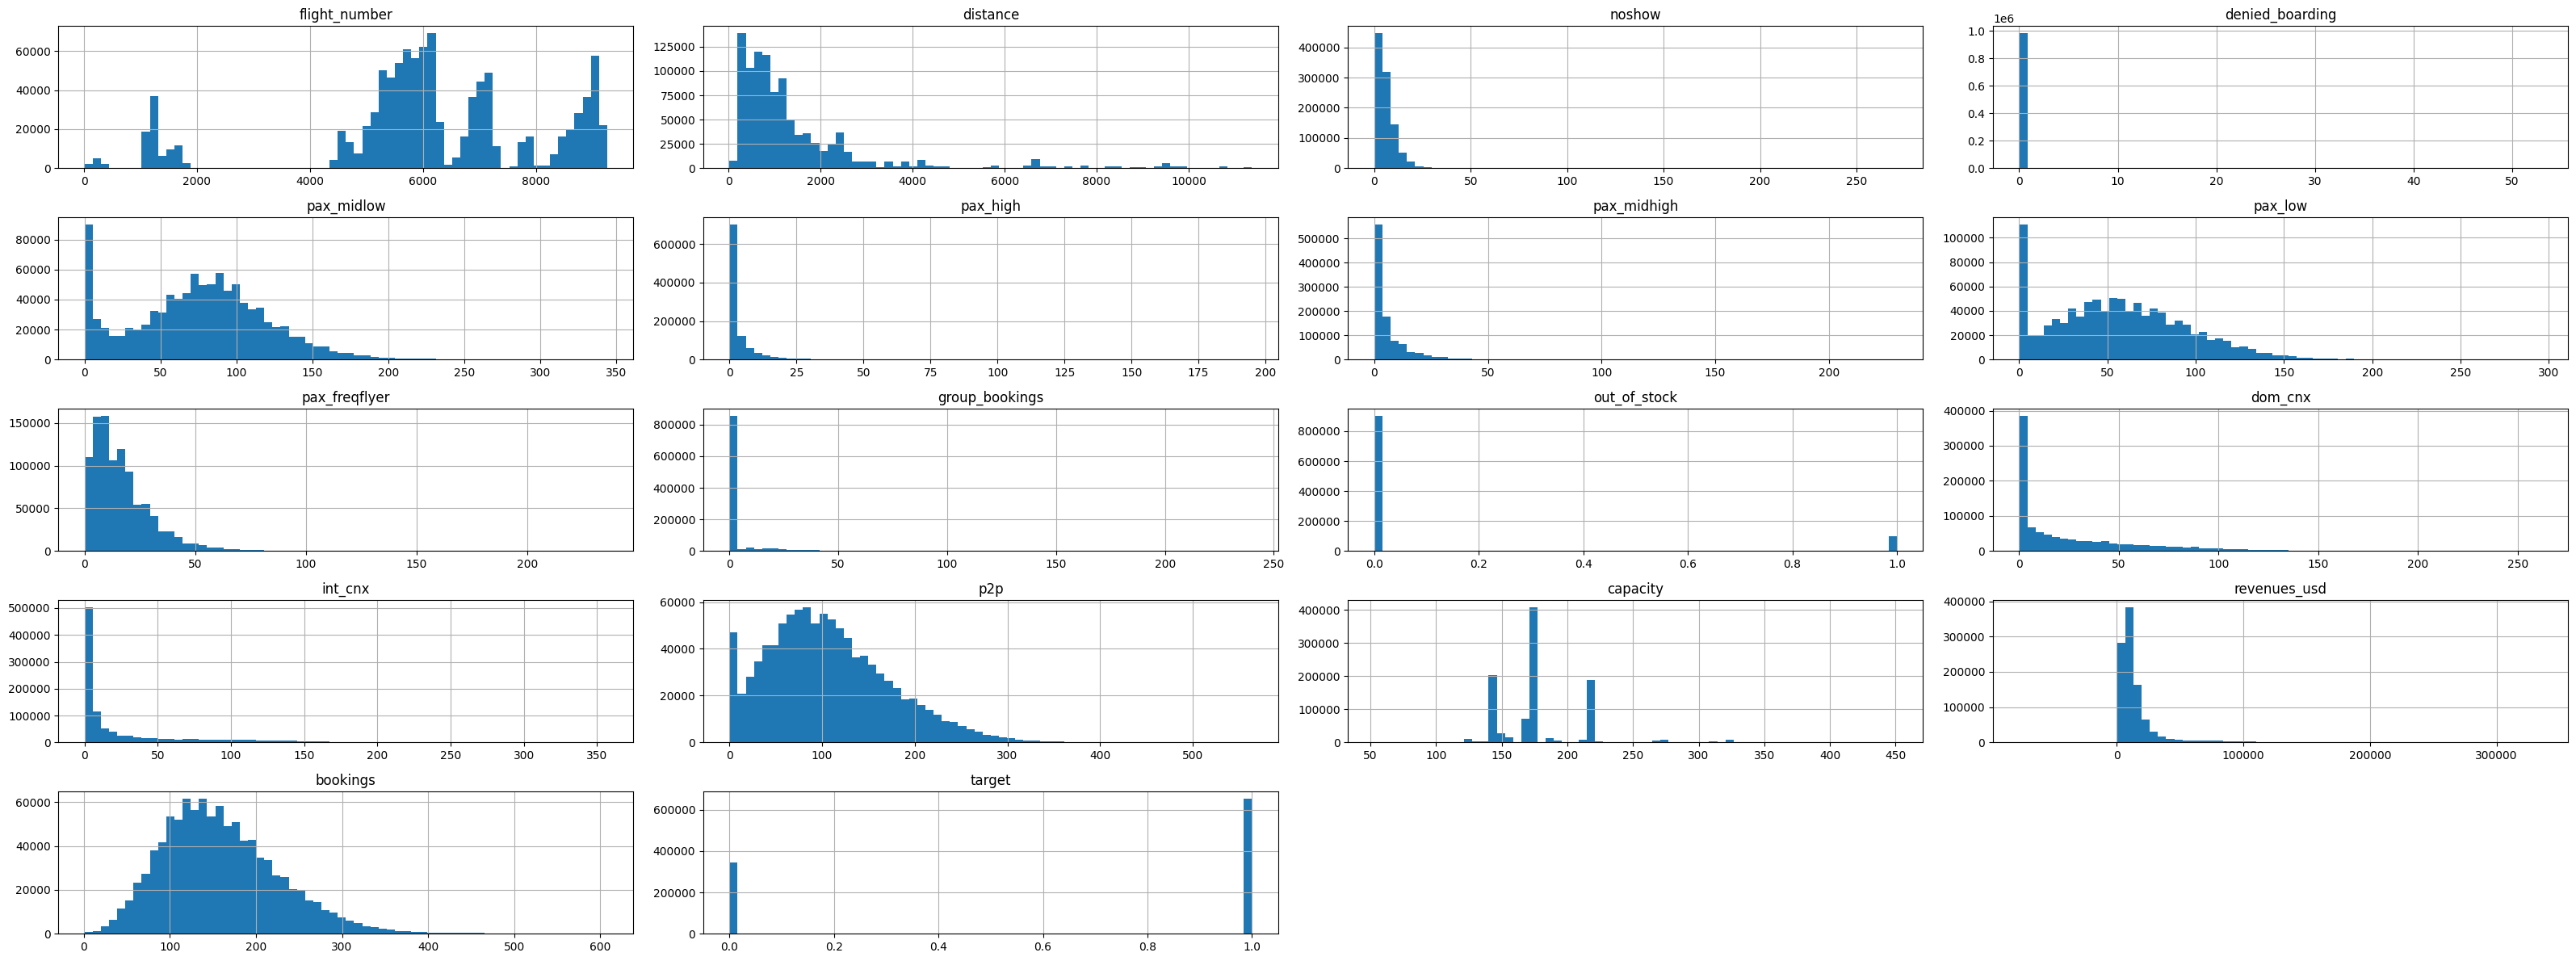

In [183]:
df_train.select_dtypes(np.number).hist(figsize=(32, 12), bins=64)
plt.tight_layout()

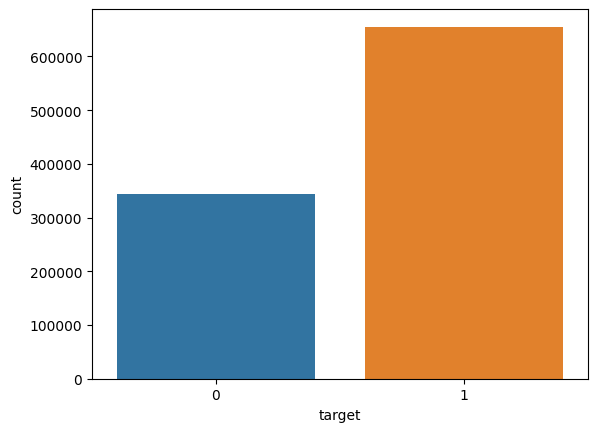

In [184]:
# plot de nsbin (noshow binario)
sns.countplot(x="target", data=df_train);

## EDA

## Valores Ausentes

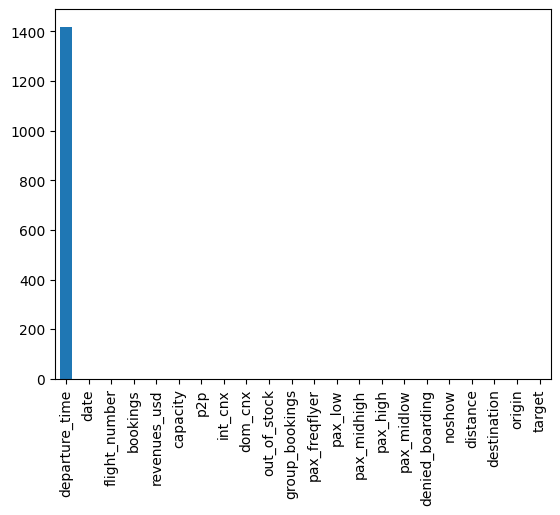

In [185]:
# conteo de valores austentes
df_train.isnull().sum().sort_values(ascending=False).plot(kind= "bar");

Solo existen 1418 valores ausentes en departure_time

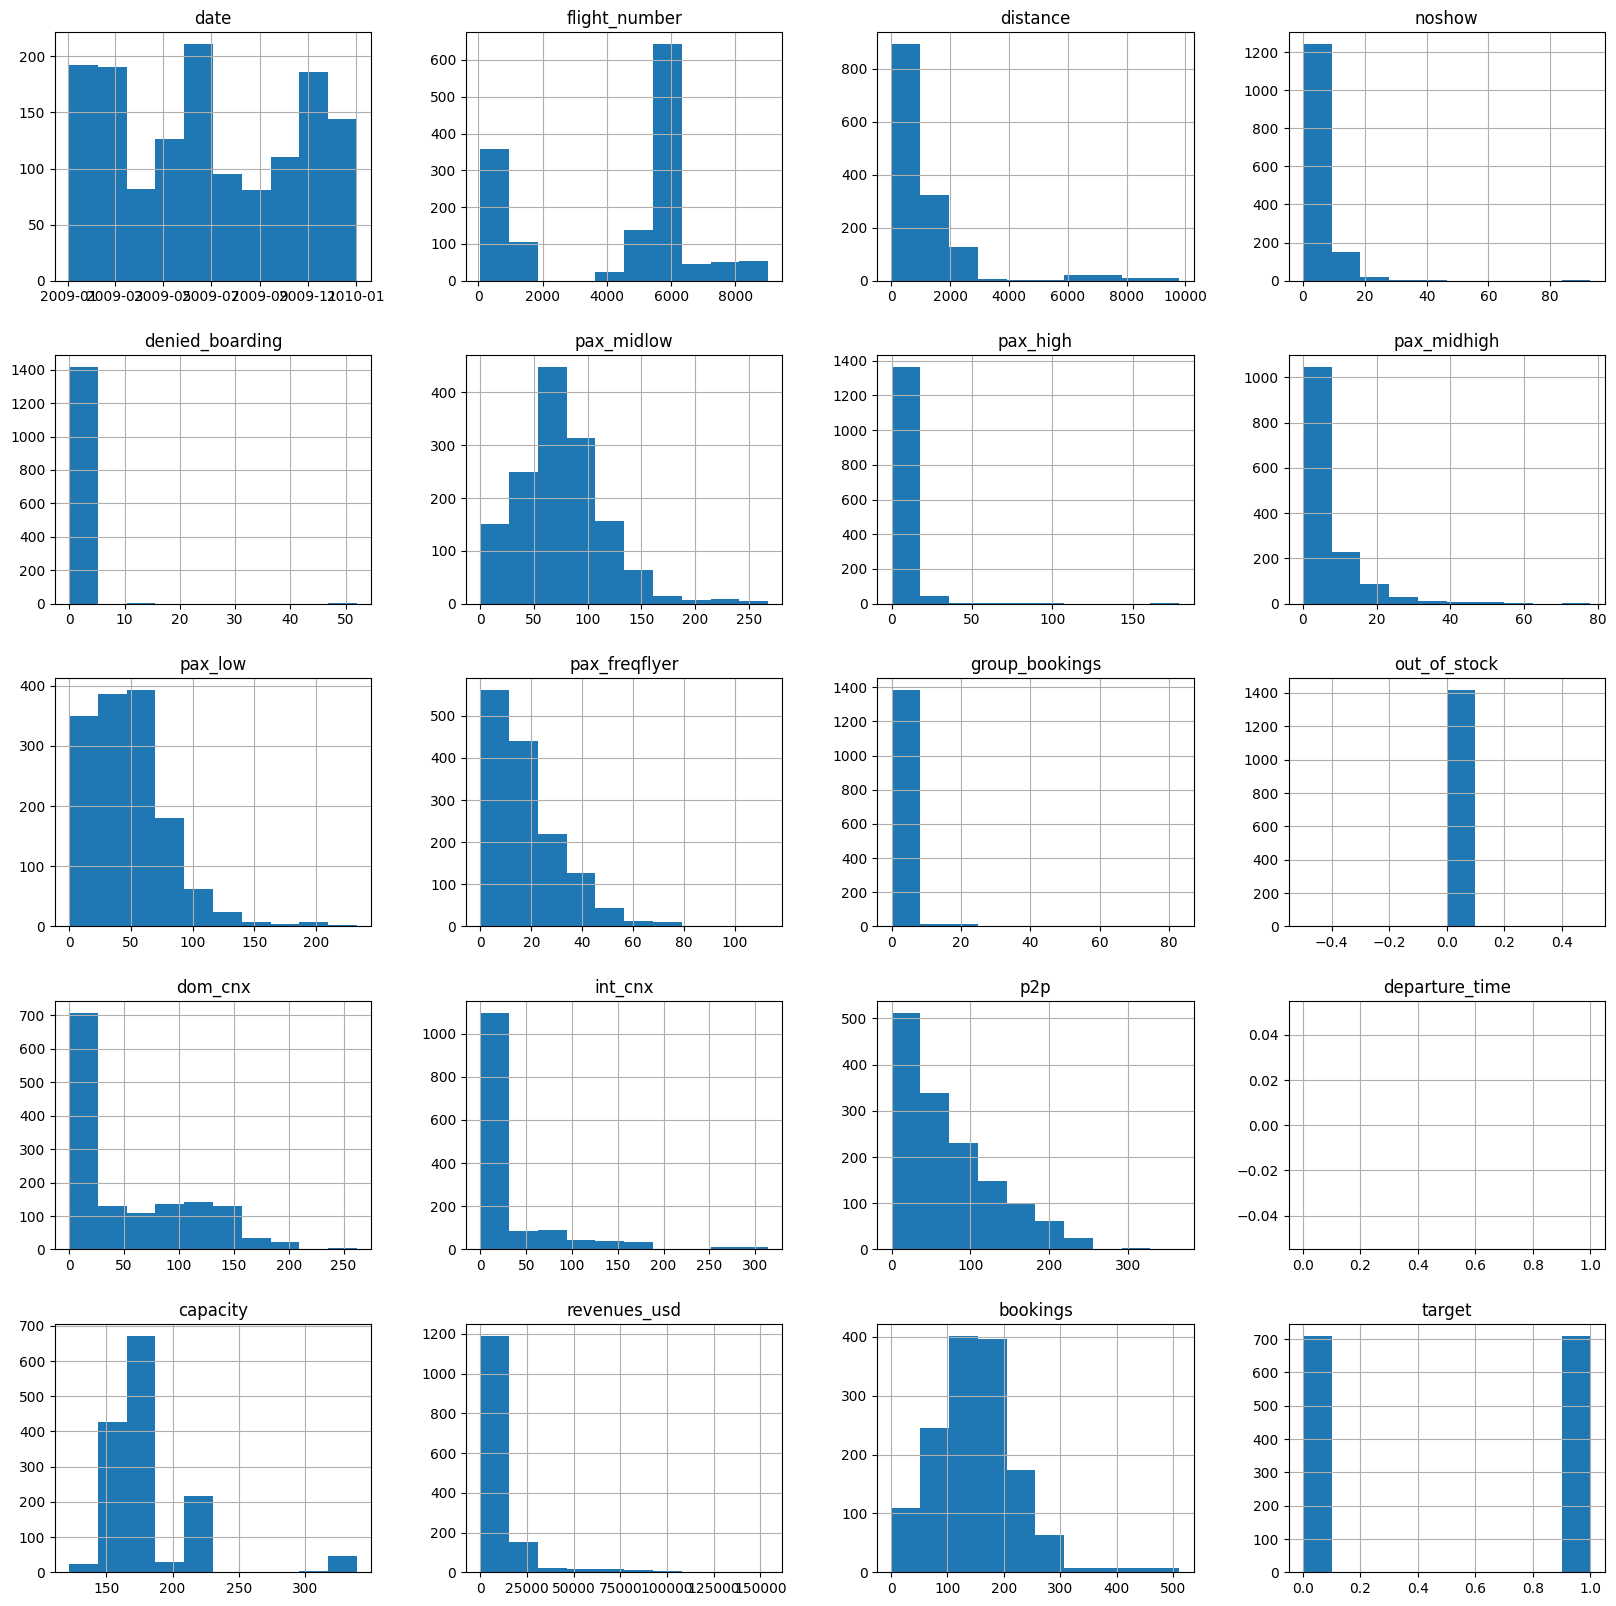

In [186]:
df_train.query("departure_time.isna()").hist(figsize = (20, 20));

In [187]:
df_train["trip"] = (df_train.origin.astype(str) + "-" + df_train.destination.astype(str))#.value_counts().head(50).plot(kind="bar", figsize = (20,6));

In [188]:
p_99 = df_train.flight_number.quantile(0.99)
data = df_train.query("flight_number <= @p_99")

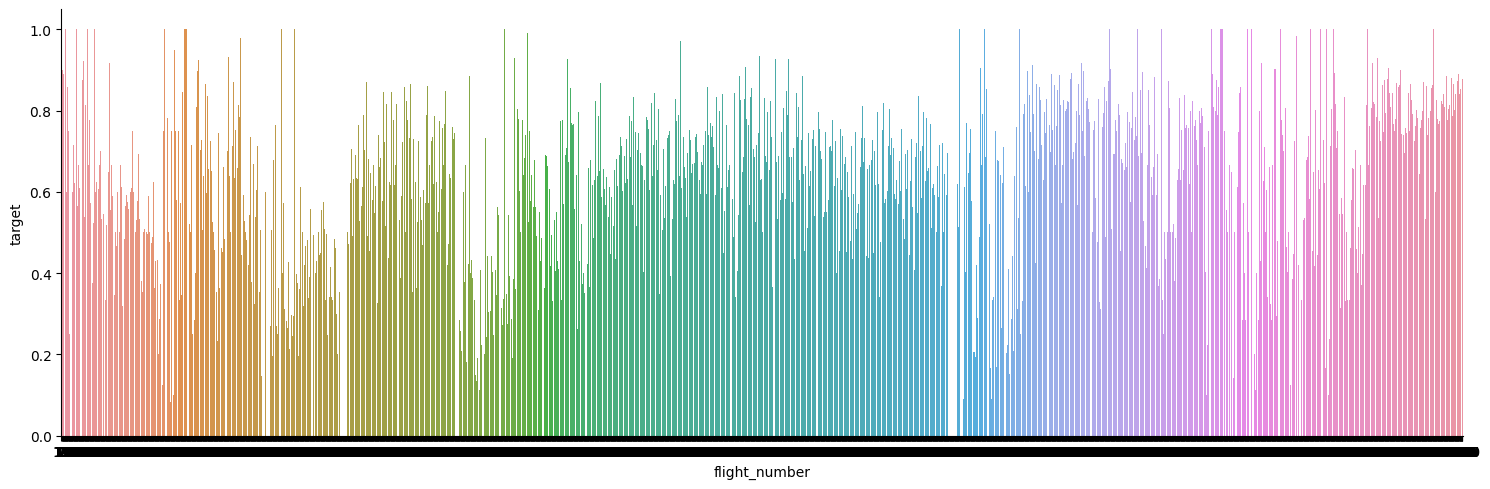

In [189]:
sns.catplot(x = "flight_number", y = "target", data = data, kind = "bar", estimator = np.mean, ci=None, aspect = 3);

## Date

In [190]:
df_train.date.agg(["min", "max"])

min   2009-01-02
max   2012-01-08
Name: date, dtype: datetime64[ns]

In [191]:
def plot_dates(df, column, label, aspect = 1):
    sns.catplot(x = column, data = df, kind = "count", aspect = aspect)
    sns.catplot(x = column, y = "target", data = df, kind = "bar", estimator = np.mean, ci=None, aspect = aspect)
    plt.title(label = f"Porcentaje Ocurrencia No Show por {label}");

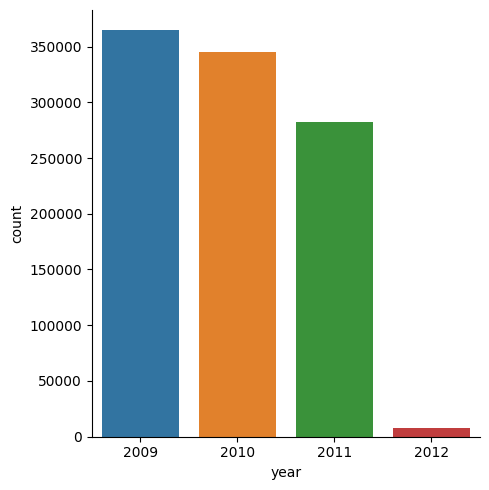

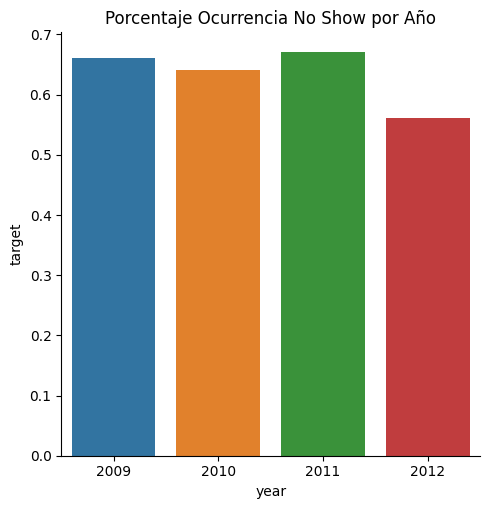

In [192]:
df_train["year"] = df_train.date.dt.year
plot_dates(df_train, "year", label = "Año")

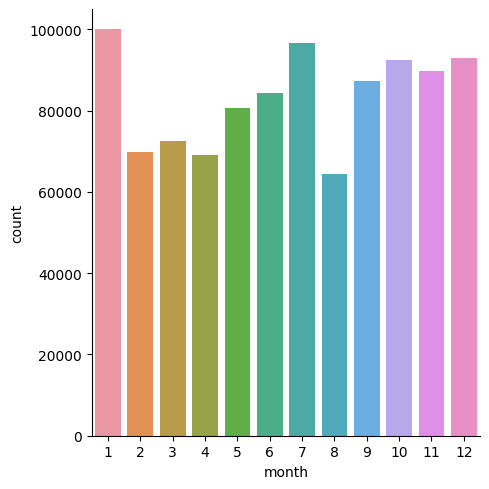

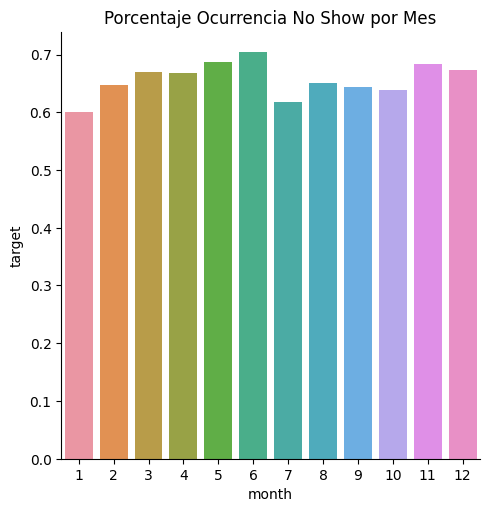

In [193]:
df_train["month"] = df_train.date.dt.month
plot_dates(df_train, "month", label = "Mes")

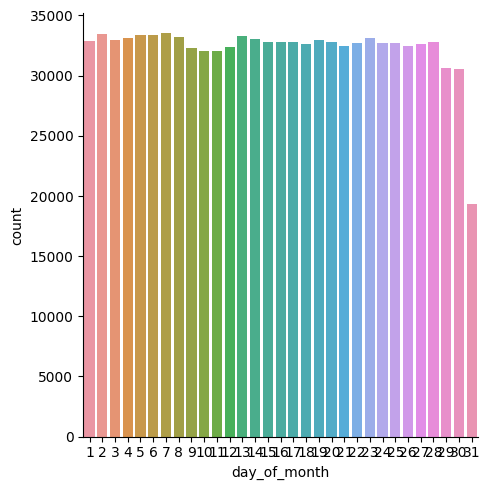

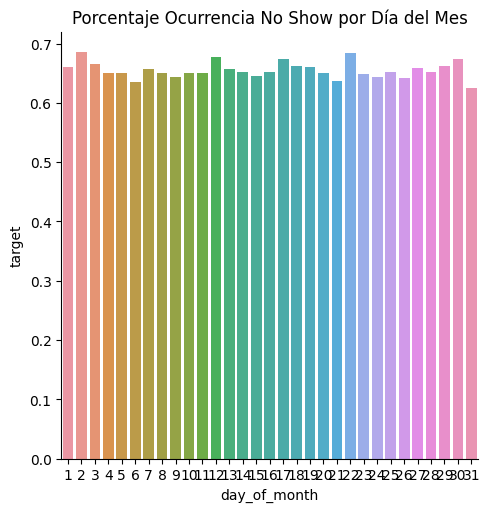

In [194]:
df_train["day_of_month"] = df_train.date.dt.day
plot_dates(df_train, "day_of_month", label = "Día del Mes")

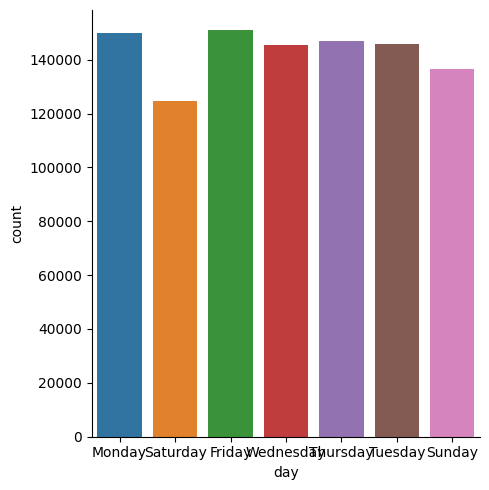

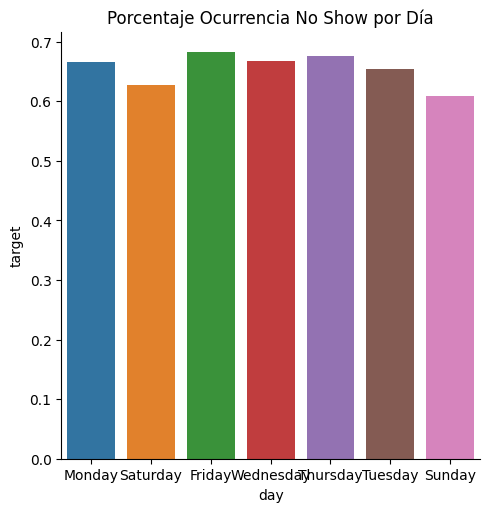

In [195]:
df_train["day"]= df_train.date.dt.day_name()
plot_dates(df_train, "day", label = "Día")

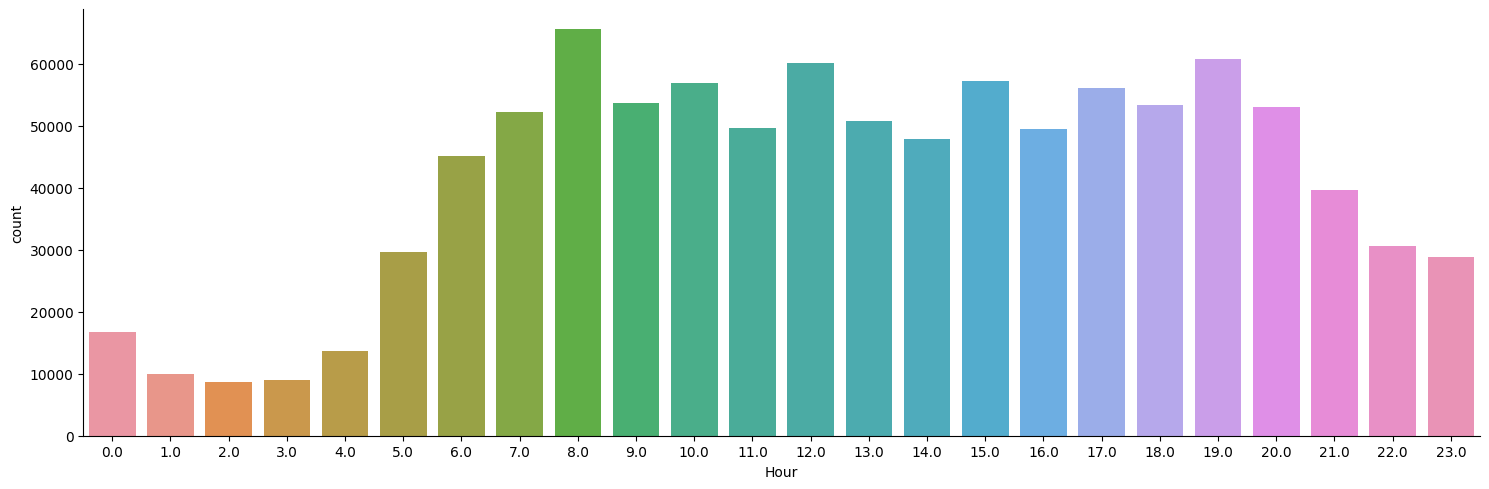

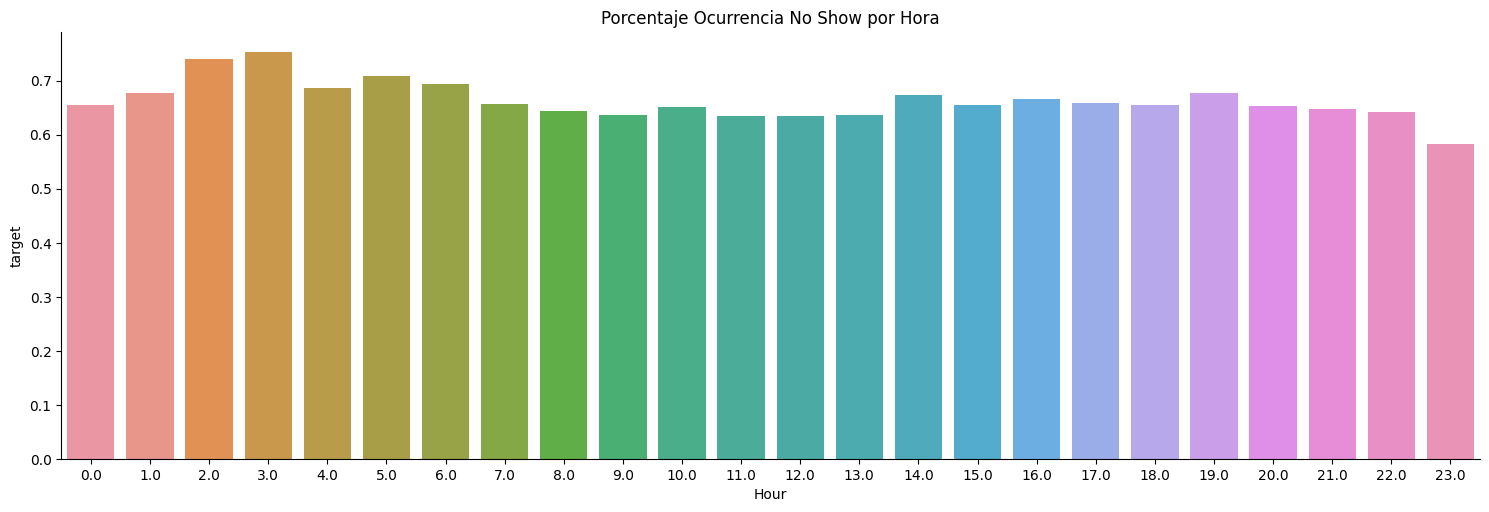

In [196]:
df_train["Hour"]= df_train.departure_time.astype("datetime64").dt.hour
plot_dates(df_train, "Hour", label = "Hora", aspect=3)

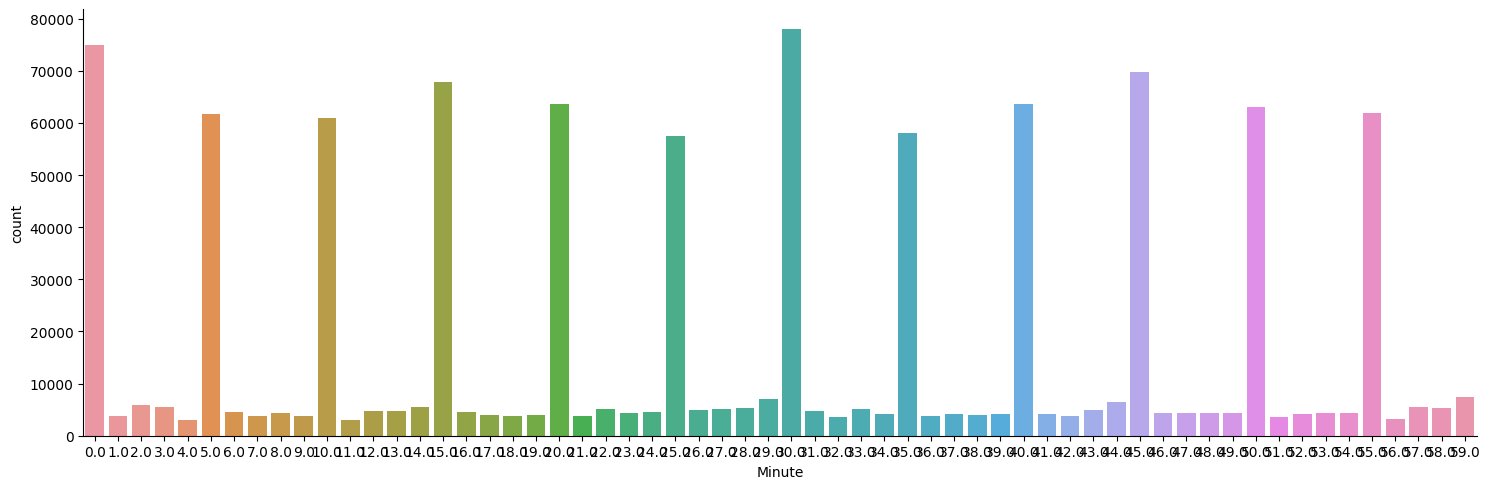

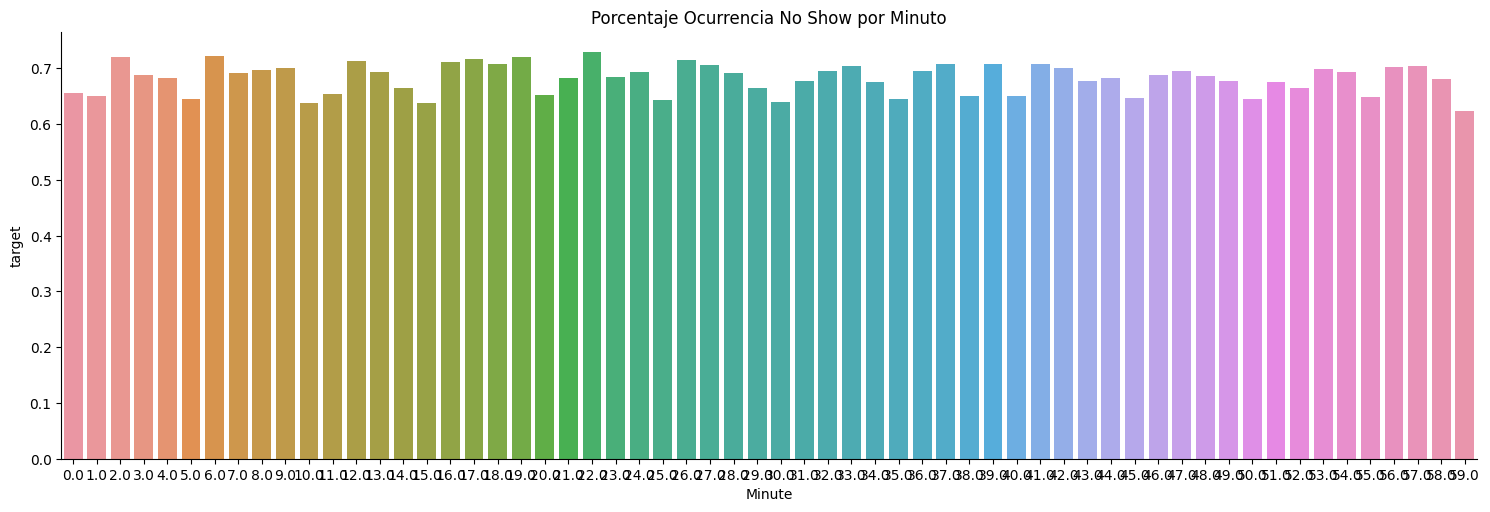

In [197]:
df_train["Minute"]= df_train.departure_time.astype("datetime64").dt.minute
plot_dates(df_train, "Minute", label = "Minuto", aspect=3)

<AxesSubplot:>

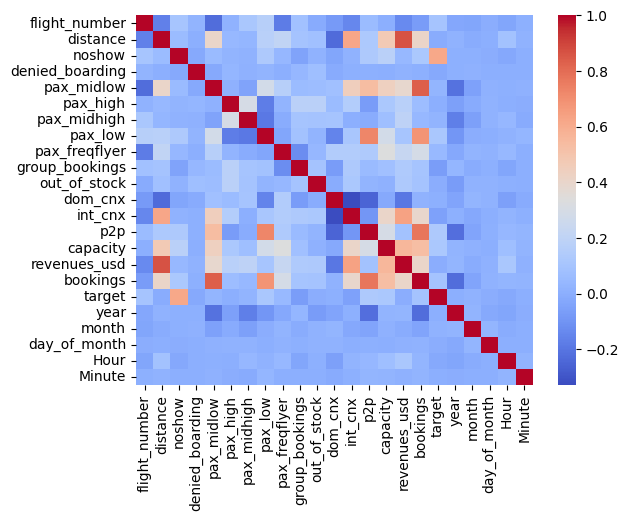

In [198]:
# heatmap de correlaciones
sns.heatmap(df_train.corr(), cmap="coolwarm")

In [199]:
# datos numéricos
num = df_train.select_dtypes(np.number)
# datos categóricos
cat = df_train[["origin","destination","flight_number", "trip"]]

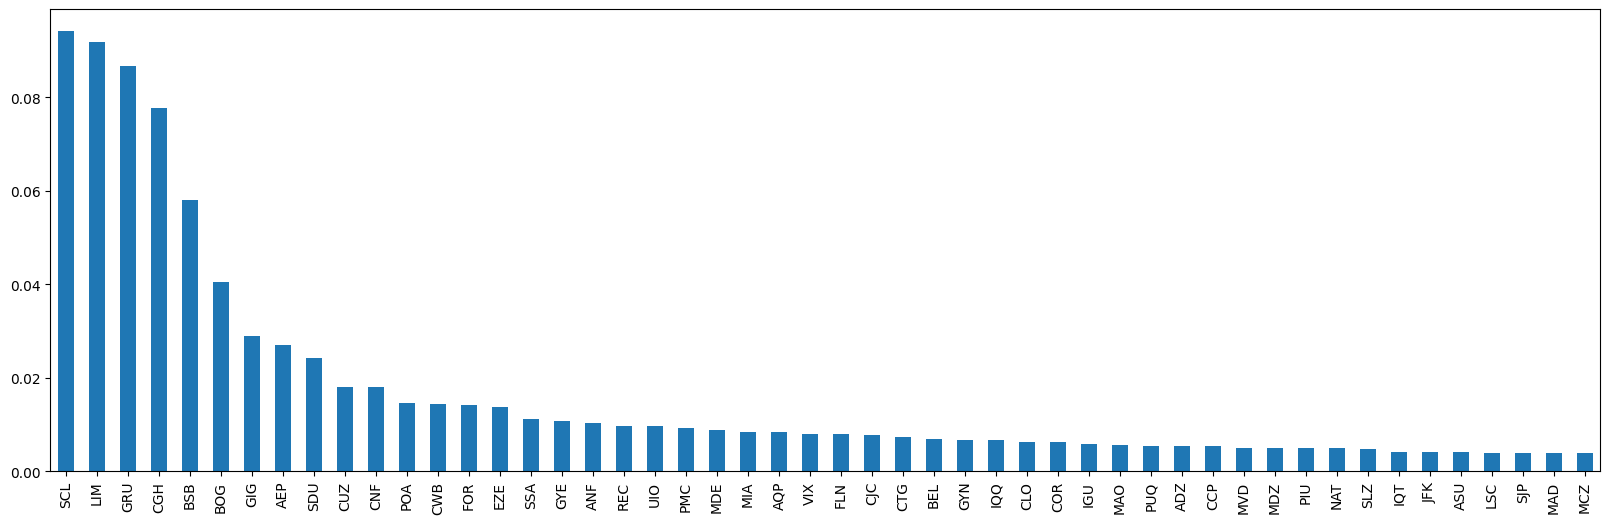

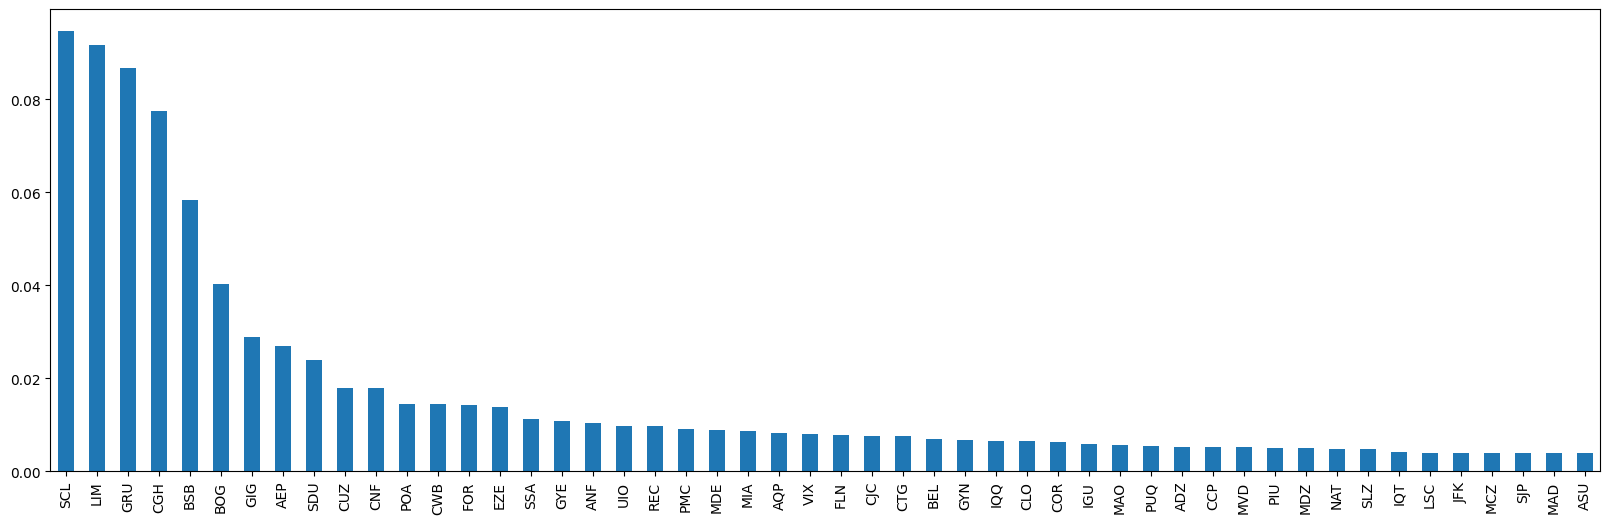

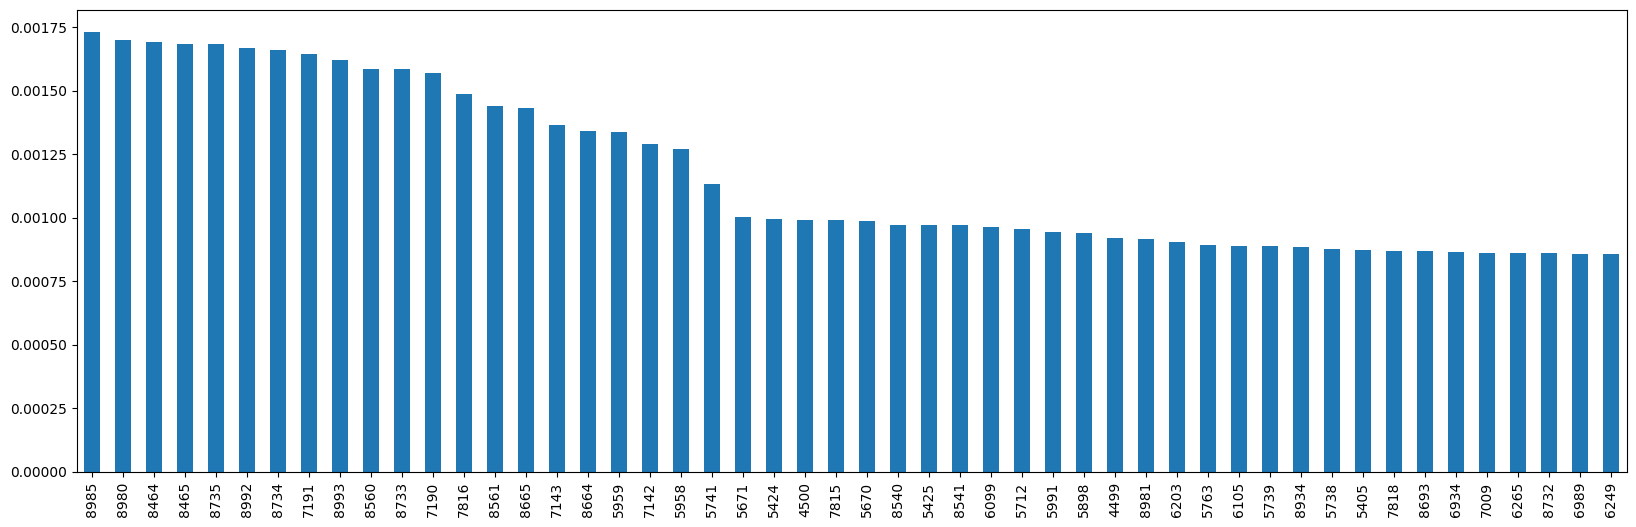

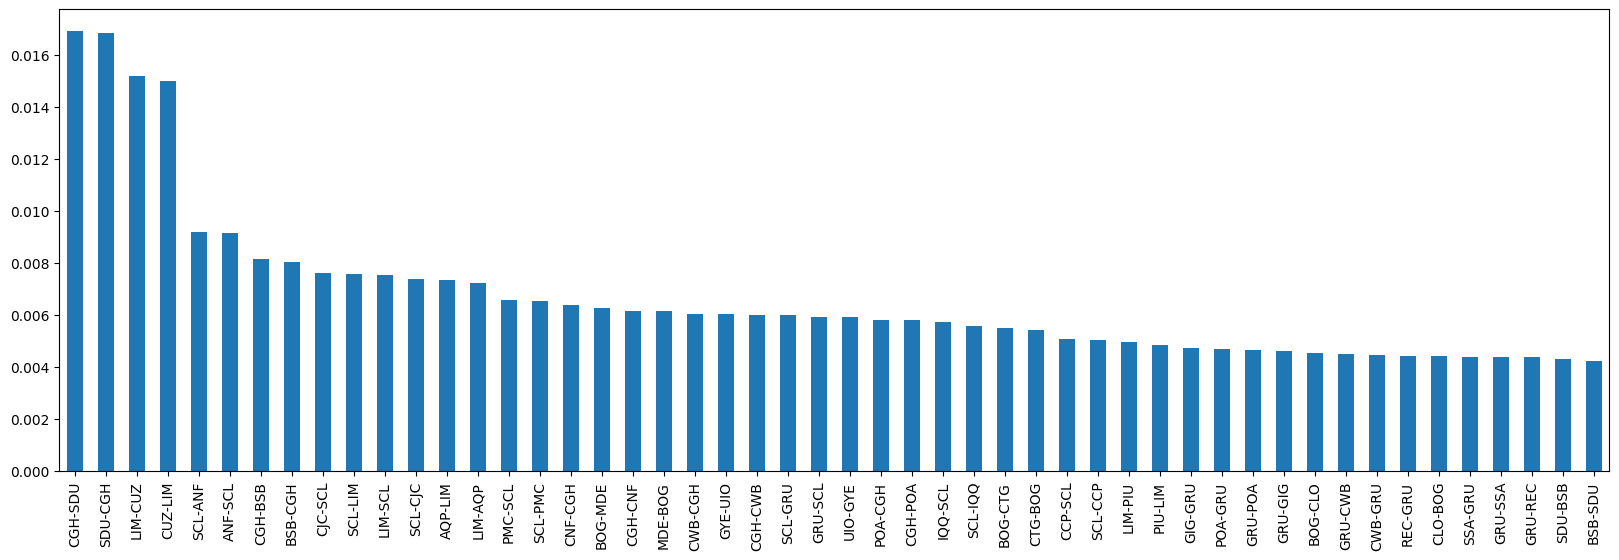

In [200]:
for var in cat: 
    cat[var].value_counts(normalize = True).head(50).plot(kind = "bar", figsize = (20,6))
    plt.show()

## Feature Engineering

In [201]:
## dataframes para eventuales datos de ingeniería de atributos

# extracción de datos respecto al booking según tipo de pago

df_train["ratio_midlow"] = df_train.pax_midlow / df_train.bookings
df_train["ratio_high"] = df_train.pax_high / df_train.bookings
df_train["ratio_midhigh"] = df_train.pax_midhigh / df_train.bookings
df_train["ratio_low"] = df_train.pax_low / df_train.bookings
df_train["ratio_freqflyer"] = df_train.pax_freqflyer / df_train.bookings


# extracción de datos relativos a la fecha
# dates = pd.DataFrame()
# dates["year"] = df_train.date.transform(lambda x: int(x.split("-")[0]))
# dates["month"] = df_train.date.transform(lambda x: int(x.split("-")[1]))
# dates["day"] = df_train.date.transform(lambda x: int(x.split("-")[2]))
# dates["weekday"] = df_train.date.transform(lambda x: pd.to_datetime(x).weekday())
# # hora numérica
# dates["dtime_numeric"] = df_train.dt_numeric


# codificación de datos cíclicos
# cycles = pd.DataFrame()
# cycles["departure_time_sin"] = np.sin(2 * np.pi * dates.dtime_numeric / 1440)
# cycles["departure_time_cos"] = np.cos(2 * np.pi * dates.dtime_numeric / 1440)
# cycles["month_sin"] = np.sin(2 * np.pi * dates.month / 12)
# cycles["month_cos"] = np.cos(2 * np.pi * dates.month / 12)
# cycles["day_sin"] = np.sin(2 * np.pi * dates.day / 31)
# cycles["day_cos"] = np.cos(2 * np.pi * dates.day / 31)
# cycles["weekday_sin"] = np.sin(2 * np.pi * dates.weekday / 7)
# cycles["weekday_cos"] = np.cos(2 * np.pi * dates.weekday / 7)

In [202]:
# # df con datos de ingeniería de atributos exc
# full_train = pd.concat([num, cat, ratios, dates, cycles], axis=1)
# cycle_train = pd.concat([num, cycles], axis=1)

In [203]:
df_train = df_train.drop(columns = ["noshow", "departure_time", "date"]).dropna()
X = df_train.drop(columns = ["target"])
y = df_train.target

## Modelo Naive Bayes

In [204]:
# módulos para naive bayes classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder, MeanEncoder
from feature_engine.creation import CyclicalFeatures
from sklearn.pipeline import Pipeline



In [205]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [207]:
prep = Pipeline(steps = [("ord", OrdinalEncoder(encoding_method = "arbitrary", variables = ["flight_number", "origin", "destination", "trip","day"], ignore_format=True)),
                        ("cyc", CyclicalFeatures(variables = ['year','month', 'day_of_month', 'day', 'Hour', 'Minute'], drop_original = False)),
                        ("scaler", StandardScaler())

])

pipe = Pipeline(steps = [("prep", prep),
                            ("clf", GaussianNB())]
                )


In [211]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ord',
                 OrdinalEncoder(encoding_method='arbitrary', ignore_format=True,
                                variables=['flight_number', 'origin',
                                           'destination', 'trip', 'day'])),
                ('cyc',
                 CyclicalFeatures(variables=['year', 'month', 'day_of_month',
                                             'day', 'Hour', 'Minute'])),
                ('scaler', StandardScaler())])

In [127]:
# predicción
y_pred = gnb.predict(X_test)

# métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6491580740548127
Confusion matrix:
 [[ 19311  84433]
 [ 20808 175415]]
Classification report:
               precision    recall  f1-score   support

           0       0.48      0.19      0.27    103744
           1       0.68      0.89      0.77    196223

    accuracy                           0.65    299967
   macro avg       0.58      0.54      0.52    299967
weighted avg       0.61      0.65      0.60    299967



# Modelo Ensamblado: XGBoost

In [158]:
# módulos para XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [180]:
le.fit_transform(full_train.origin)

array([ 12,  79, 122, ...,  62,  53, 144])

In [181]:
# XGBoost
xgb = XGBClassifier()

# imputacion
full_train.fillna(full_train.mean(), inplace=True)

# encoding
le = preprocessing.LabelEncoder()
full_train["origin"] = le.fit_transform(full_train.origin)
full_train["destination"] = le.fit_transform(full_train.destination)
full_train["flight_number"] = le.fit_transform(full_train.flight_number)

# split
X_train, X_test, y_train, y_test = train_test_split(full_train.drop(["nsbin", "noshow"], axis=1), full_train.nsbin, test_size=0.2, random_state=42)

# fit
xgb.fit(X_train, y_train)

# predicción
y_pred = xgb.predict(X_test)

# métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

C:\Users\ALEX\AppData\Local\Temp\ipykernel_17840\119870499.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  full_train.fillna(full_train.mean(), inplace=True)


Accuracy: 0.7262748902379261
Confusion matrix:
 [[ 29088  40020]
 [ 14719 116151]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.42      0.52     69108
           1       0.74      0.89      0.81    130870

    accuracy                           0.73    199978
   macro avg       0.70      0.65      0.66    199978
weighted avg       0.72      0.73      0.71    199978



In [182]:
# XGBoost
xgb = XGBClassifier()

# imputacion
df_train.fillna(df_train.mean(), inplace=True)

# encoding
le = preprocessing.LabelEncoder()
full_train["origin"] = le.fit_transform(full_train.origin)
full_train["destination"] = le.fit_transform(full_train.destination)
full_train["flight_number"] = le.fit_transform(full_train.flight_number)

#remove destination
full_train.drop("destination", axis=1, inplace=True)

# split
X_train, X_test, y_train, y_test = train_test_split(full_train.drop(["nsbin", "noshow"], axis=1), full_train.nsbin, test_size=0.2, random_state=42)

# fit
xgb.fit(X_train, y_train)

# predicción
y_pred = xgb.predict(X_test)

# métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))